**Medical Insurance with Neural Network Regression in TensorFlow**

In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
insurance_one_hot_main = insurance_one_hot.replace({True:1, False:0})


C:\Users\venka\AppData\Local\Temp\ipykernel_5860\2620498821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_one_hot_main = insurance_one_hot.replace({True:1, False:0})


In [6]:
insurance_one_hot_main

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
#Create X_values and Y_values
X = insurance_one_hot_main.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [8]:
y = insurance_one_hot_main["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
# Create Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 694us/step - loss: 9034.0176 - mae: 9034.0176
Epoch 2/100
34/34 [==============================] - 0s 605us/step - loss: 7874.6738 - mae: 7874.6738
Epoch 3/100
34/34 [==============================] - 0s 606us/step - loss: 7597.6279 - mae: 7597.6279
Epoch 4/100
34/34 [==============================] - 0s 630us/step - loss: 7716.4692 - mae: 7716.4692
Epoch 5/100
34/34 [==============================] - 0s 647us/step - loss: 7657.1665 - mae: 7657.1665
Epoch 6/100
34/34 [==============================] - 0s 648us/step - loss: 7667.6743 - mae: 7667.6743
Epoch 7/100
34/34 [==============================] - 0s 598us/step - loss: 7552.1689 - mae: 7552.1689
Epoch 8/100
34/34 [==============================] - 0s 636us/step - loss: 7764.0103 - mae: 7764.0103
Epoch 9/100
34/34 [==============================] - 0s 654us/step - loss: 7441.7065 - mae: 7441.7065
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7756.070

In [11]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 918us/step - loss: 6743.1104 - mae: 6743.1104


[6743.1103515625, 6743.1103515625]

** MODEL-2**

In [12]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 809us/step - loss: 4982.9272 - mae: 4982.9272


[4982.92724609375, 4982.92724609375]

Text(0.5, 0, 'epochs')

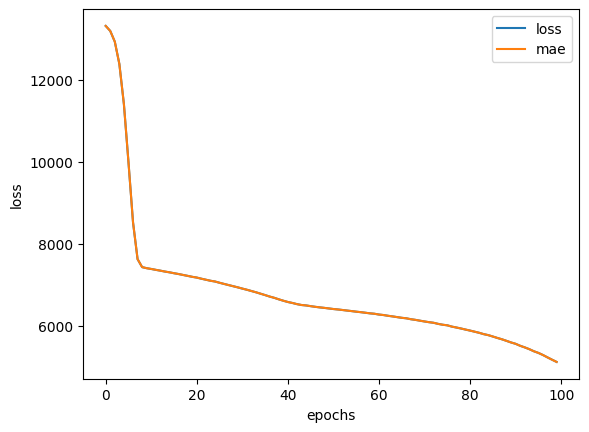

In [14]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [15]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 715us/step - loss: 3503.6238 - mae: 3503.6238


(3503.623779296875, 3503.623779296875)

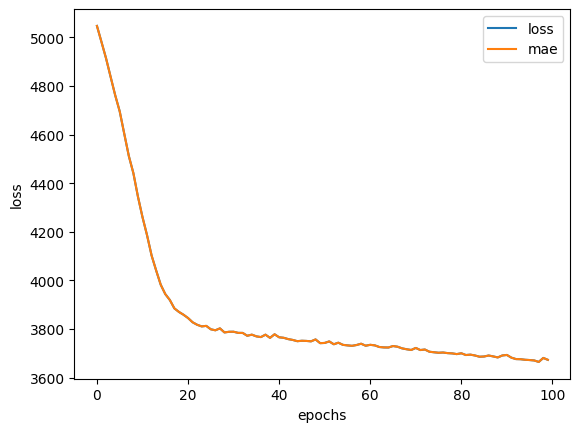

In [17]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); 